# **Análisis Juegos Olímpicos de Invierno**

In [1]:
import numpy as np  # muy útil para cálculos científicos con Python
import pandas as pd # Librería para estructar datos primarios

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec


In [2]:
#IMPORTANTE: Se debe revisar previamente el nombre del archivo, para que el documento sea leído. Si está mal escrito, se mostrará un mensaje de error.
athletes = pd.read_csv("athlete_events_dataset.csv") #pd.read_csv("athlete_events_dataset.csv")
regions = pd.read_csv("country_definitions.csv")     #pd.read_csv("noc_regions.csv") 
oly_medal = pd.read_csv("olympic_medalist.csv")
medal_2018 = pd.read_csv("pyeongchang_medal_2018.csv")
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Se empieza con un vistazo al medallero en los últimos Juegos Olímpicos en Pyeongchang (República de Corea) en 2018.

In [3]:
medal_2018.head(20)

,Rank,Country,NOC,Gold,Silver,Bronze,Total
0,1,Norway,NOR,14,14,11,39
1,2,Germany,GER,14,10,7,31
2,3,Canada,CAN,11,8,10,29
3,4,United States of America,USA,9,8,6,23
4,5,Netherlands,NED,8,6,6,20
5,6,Sweden,SWE,7,6,1,14
6,7,South Korea,KOR,5,8,4,17
7,8,Switzerland,SUI,5,6,4,15
8,9,France,FRA,5,4,6,15
9,10,Austria,AUT,5,3,6,14


Ahora, se muestra el dataset de los atletas que participaron en los Juegos Olímpicos hasta 2014 (Invierno) y Rio 2016 (Verano)

In [4]:
df_athletes = athletes.merge(regions, how='left', on='NOC')
df_athletes.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [5]:
df_athletes.rename(columns={'region':'Country','notes':'Notes'}, inplace=True)
df_athletes.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


Antes de empezar a trabajar con el dataset de los Juegos Olímpicos, se debe hacer un pre-procesamiento de los datos. Esto consiste en cuantificar los valores nulos, y cómo manejar cada variable faltante.

**0. PRE-PROCESAMIENTO DEL DATAFRAME**

En primera instancia, queremos saber cuántos valores nulos hay.

In [6]:
missing_data = df_athletes.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ID
False    271116
Name: ID, dtype: int64

Name
False    271116
Name: Name, dtype: int64

Sex
False    271116
Name: Sex, dtype: int64

Age
False    261642
True       9474
Name: Age, dtype: int64

Height
False    210945
True      60171
Name: Height, dtype: int64

Weight
False    208241
True      62875
Name: Weight, dtype: int64

Team
False    271116
Name: Team, dtype: int64

NOC
False    271116
Name: NOC, dtype: int64

Games
False    271116
Name: Games, dtype: int64

Year
False    271116
Name: Year, dtype: int64

Season
False    271116
Name: Season, dtype: int64

City
False    271116
Name: City, dtype: int64

Sport
False    271116
Name: Sport, dtype: int64

Event
False    271116
Name: Event, dtype: int64

Medal
True     231333
False     39783
Name: Medal, dtype: int64

Country
False    271114
True          2
Name: Country, dtype: int64

Notes
True     266077
False      5039
Name: Notes, dtype: int64



Con base en el resumen de arriba, cada columna tiene 27116 filas de datos, cinco columnas contienen información faltante:

<ol>
    <li>"Age": 9474 datos faltantes</li>
    <li>"Height": 60171 datos faltantes</li>
    <li>"Weight": 62875 datos faltantes</li>
    <li>"Country" : 2 datos faltantes</li>
    <li>"Notes": 5039 datos faltantes</li>
</ol>

Los datos faltantes de Edad, Peso y Altura, se sustituirán por la media de los mismos. Por su parte hay que revisar los datos de Country y Notes para determinar si amerita una sustitución.

**Calcular el promedio de las columnas Age, Height y Weight**

In [7]:
avg_age_loss = df_athletes["Age"].astype("float").mean(axis=0)
print("Average of Age:", avg_age_loss)

df_athletes["Age"].replace(np.nan, avg_age_loss, inplace=True)

Average of Age: 25.556898357297374


In [8]:
avg_height_loss = df_athletes["Height"].astype("float").mean(axis=0)
print("Average of Height:", avg_height_loss)

df_athletes["Height"].replace(np.nan, avg_height_loss, inplace=True)

Average of Height: 175.33896987366376


In [9]:
avg_weight_loss = df_athletes["Weight"].astype("float").mean(axis=0)
print("Average of Weight:", avg_weight_loss)

df_athletes["Weight"].replace(np.nan, avg_weight_loss, inplace=True)

Average of Weight: 70.70239290053351


Para el preprocesamiento, no se tomará en cuenta los valores faltantes en la columna Medal, ya que se creará un dataframe aparte que contenga todas las medallas ganadas por los países que han participado en los Juegos Olímpicos.

Antes de realizar este paso, se divide el dataset en dos: uno para los Juegos de Verano y otro para los Juegos Olímpicos de Invierno.

In [10]:
df_winter = df_athletes[df_athletes['Season']=='Winter']
df_winter.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN


In [11]:
df_summer = df_athletes[df_athletes['Season']=='Summer']
df_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


Luego de la separación de los dataframes, se depura los atletas que no ganaron medallas en WOG y SOG.

In [12]:
# elimina toda la fila con NaN en la columna "Medal"
athletesSummer = df_summer.dropna(subset=['Medal'])
athletesSummer.columns[athletesSummer.nunique() <= 1]

Index(['Season'], dtype='object')

In [13]:
# elimina toda la fila con NaN en la columna "Medal"
athletesWinter = df_winter.dropna(subset=['Medal'])
athletesWinter.columns[athletesWinter.nunique() <= 1]

Index(['Season', 'Notes'], dtype='object')

Ahora, se procederá a eliminar las medallas duplicadas. Esto aplica principalmente en los deportes de conjunto (Como Hockey sobre Hielo) ya que las medallas se otorgan al país ganador mientras que en el dataset, cada jugador de Hockey (siguiendo con el ejemplo) suma medalla y, a la larga, aumenta artificialmente la cantidad de preseas ganadas en los WOG y SOG.

In [14]:
pd.get_dummies(athletesSummer['Medal'])
pd.get_dummies(athletesWinter['Medal'])

,Bronze,Gold,Silver
40,1,0,0
60,0,1,0
61,1,0,0
63,0,0,1
64,1,0,0
...,...,...,...
270641,0,1,0
270827,0,0,1
270876,0,1,0
270878,1,0,0


In [15]:
athletesSummer.duplicated().sum()
athletesWinter.duplicated().sum()

0

In [16]:
athletesSummer.drop_duplicates(inplace=True)
athletesWinter.drop_duplicates(inplace=True)

In [17]:
pd.get_dummies(athletesSummer['Medal'])
pd.get_dummies(athletesWinter['Medal'])

,Bronze,Gold,Silver
40,1,0,0
60,0,1,0
61,1,0,0
63,0,0,1
64,1,0,0
...,...,...,...
270641,0,1,0
270827,0,0,1
270876,0,1,0
270878,1,0,0


In [18]:
summer = pd.concat([athletesSummer,pd.get_dummies(athletesSummer['Medal'])],axis=1)
#winter.head(2)
winter = pd.concat([athletesWinter,pd.get_dummies(athletesWinter['Medal'])],axis=1)
summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
37,15,Arvo Ossian Aaltonen,M,30.0,175.33897,70.702393,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0


In [19]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       271116 non-null  int64  
 1   Name     271116 non-null  object 
 2   Sex      271116 non-null  object 
 3   Age      271116 non-null  float64
 4   Height   271116 non-null  float64
 5   Weight   271116 non-null  float64
 6   Team     271116 non-null  object 
 7   NOC      271116 non-null  object 
 8   Games    271116 non-null  object 
 9   Year     271116 non-null  int64  
 10  Season   271116 non-null  object 
 11  City     271116 non-null  object 
 12  Sport    271116 non-null  object 
 13  Event    271116 non-null  object 
 14  Medal    39783 non-null   object 
 15  Country  271114 non-null  object 
 16  Notes    5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [20]:
df_winter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48564 entries, 4 to 271115
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       48564 non-null  int64  
 1   Name     48564 non-null  object 
 2   Sex      48564 non-null  object 
 3   Age      48564 non-null  float64
 4   Height   48564 non-null  float64
 5   Weight   48564 non-null  float64
 6   Team     48564 non-null  object 
 7   NOC      48564 non-null  object 
 8   Games    48564 non-null  object 
 9   Year     48564 non-null  int64  
 10  Season   48564 non-null  object 
 11  City     48564 non-null  object 
 12  Sport    48564 non-null  object 
 13  Event    48564 non-null  object 
 14  Medal    5695 non-null   object 
 15  Country  48564 non-null  object 
 16  Notes    638 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 6.7+ MB


In [21]:
athletesWinter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5695 entries, 40 to 270886
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       5695 non-null   int64  
 1   Name     5695 non-null   object 
 2   Sex      5695 non-null   object 
 3   Age      5695 non-null   float64
 4   Height   5695 non-null   float64
 5   Weight   5695 non-null   float64
 6   Team     5695 non-null   object 
 7   NOC      5695 non-null   object 
 8   Games    5695 non-null   object 
 9   Year     5695 non-null   int64  
 10  Season   5695 non-null   object 
 11  City     5695 non-null   object 
 12  Sport    5695 non-null   object 
 13  Event    5695 non-null   object 
 14  Medal    5695 non-null   object 
 15  Country  5695 non-null   object 
 16  Notes    7 non-null      object 
dtypes: float64(3), int64(2), object(12)
memory usage: 800.9+ KB


In [22]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5695 entries, 40 to 270886
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       5695 non-null   int64  
 1   Name     5695 non-null   object 
 2   Sex      5695 non-null   object 
 3   Age      5695 non-null   float64
 4   Height   5695 non-null   float64
 5   Weight   5695 non-null   float64
 6   Team     5695 non-null   object 
 7   NOC      5695 non-null   object 
 8   Games    5695 non-null   object 
 9   Year     5695 non-null   int64  
 10  Season   5695 non-null   object 
 11  City     5695 non-null   object 
 12  Sport    5695 non-null   object 
 13  Event    5695 non-null   object 
 14  Medal    5695 non-null   object 
 15  Country  5695 non-null   object 
 16  Notes    7 non-null      object 
 17  Bronze   5695 non-null   uint8  
 18  Gold     5695 non-null   uint8  
 19  Silver   5695 non-null   uint8  
dtypes: float64(3), int64(2), object(12), uint8(3)
mem

Se valida los deportes que están en el programa de los WOG y SOG.

In [23]:
winter_sport = df_winter[df_winter.Season=='Winter'].Sport.unique()
winter_sport

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [24]:
summer_sport = df_summer[df_summer.Season=='Summer'].Sport.unique()
summer_sport

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

Se crea un dataset que tome en consideración las medallas ganadas por país. 

In [25]:
countMedal_winter = winter.drop_duplicates(subset=['Team','NOC','Country','Games','Year','City','Sport','Event','Medal'])
#countMedal_winter = countMedal_winter.drop_duplicates(subset=['NOC','Country','Event','Medal'])
countMedal_winter.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Notes,Bronze,Gold,Silver
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN,1,0,0
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN,0,1,0


In [26]:
countMedal_winter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2853 entries, 40 to 270886
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       2853 non-null   int64  
 1   Name     2853 non-null   object 
 2   Sex      2853 non-null   object 
 3   Age      2853 non-null   float64
 4   Height   2853 non-null   float64
 5   Weight   2853 non-null   float64
 6   Team     2853 non-null   object 
 7   NOC      2853 non-null   object 
 8   Games    2853 non-null   object 
 9   Year     2853 non-null   int64  
 10  Season   2853 non-null   object 
 11  City     2853 non-null   object 
 12  Sport    2853 non-null   object 
 13  Event    2853 non-null   object 
 14  Medal    2853 non-null   object 
 15  Country  2853 non-null   object 
 16  Notes    4 non-null      object 
 17  Bronze   2853 non-null   uint8  
 18  Gold     2853 non-null   uint8  
 19  Silver   2853 non-null   uint8  
dtypes: float64(3), int64(2), object(12), uint8(3)
mem

In [27]:
countMedal_summer = summer.drop_duplicates(subset=['Team','NOC','Country','Games','Year','City','Sport','Event','Medal'])
countMedal_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
37,15,Arvo Ossian Aaltonen,M,30.0,175.33897,70.702393,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0


Ya preprocesado en primera instancia los dataset, se empezará a continuación el análisis/obtención de información relacionada de los Juegos Olímpicos.

**1. RENDIMIENTO POR DEPORTE**

En este apartado, se desea mostrar qué países son potencia en los deportes que forman (o formaron) parte de los Juegos Olímpicos de Invierno. Para ello, se agrupan los deportes con la mayor cantidad de medallas ganadas por los países participantes.

In [28]:
data_groupby = countMedal_winter.groupby(['Sport'])
data_groupby.head(10)
selected_sport_country = {}
for key, item in data_groupby:
    selected_df = data_groupby.get_group(key)
    selected_df = selected_df[selected_df['Medal'] != 'None'] # != None
    
    selected_sport_country[key] = selected_df['Country'].value_counts().index[0]
    selected_sport_country[key]

for key in selected_sport_country.keys():
    print(key, '---', selected_sport_country[key])

Alpine Skiing --- Austria
Alpinism --- Great Britain
Biathlon --- Germany
Bobsleigh --- Germany
Cross Country Skiing --- Russia
Curling --- Canada
Figure Skating --- Russia
Freestyle Skiing --- United States of America
Ice Hockey --- Canada
Luge --- Germany
Military Ski Patrol --- Switzerland
Nordic Combined --- Norway
Short Track Speed Skating --- South Korea
Skeleton --- United States of America
Ski Jumping --- Norway
Snowboarding --- United States of America
Speed Skating --- Netherlands


La función creada a continuación, es similar a la usada arriba para determinar los países que son dominantes en las disciplinas olímpicas.

In [29]:
def sucessful_event(medal):
    flag = 0
    data_groupby = winter.groupby(['Sport'])
    selected_sport_country = {}
    for key, item in data_groupby:
        selected_df = data_groupby.get_group(key)
        if medal == 'Overall':
            selected_df = selected_df[selected_df['Medal'] == medal]
        if medal == 'Gold':
            selected_df = selected_df[selected_df['Medal'] == medal]
        if medal == 'Silver':
            selected_df = selected_df[selected_df['Medal'] == medal]
        if medal == 'Bronze':
            selected_df = selected_df[selected_df['Medal'] == medal]
        
        selected_sport_country[key] = selected_df['NOC'].value_counts().index[0]
    
    for key in selected_sport_country.keys():
        print(key, '---', selected_sport_country[key])

In [30]:
sucessful_event('Gold')

Alpine Skiing --- AUT
Alpinism --- GBR
Biathlon --- GER
Bobsleigh --- GER
Cross Country Skiing --- NOR
Curling --- CAN
Figure Skating --- RUS
Freestyle Skiing --- USA
Ice Hockey --- CAN
Luge --- GER
Military Ski Patrol --- SUI
Nordic Combined --- NOR
Short Track Speed Skating --- KOR
Skeleton --- USA
Ski Jumping --- FIN
Snowboarding --- USA
Speed Skating --- NED


Ahora,se crea la función top_sport, la cual muestra los 5 países (Comités Olímpicos Nacionales) con la mayor cantidad de medallas ganadas. Se debe recordar que estos datos son hasta los juegos de Sochi 2014.

In [31]:
def top_sport(sport):
    selected_df = countMedal_winter[countMedal_winter['Sport'] == sport]
    selected_country = selected_sport_country[sport]
    
    counted_df_index = selected_df['NOC'].value_counts().index[0:5]
    selected_df = selected_df[selected_df['NOC'].isin(counted_df_index)]
    sns.countplot(y="NOC", data=selected_df, order=counted_df_index, palette=sns.color_palette("mako")).set_title(sport)

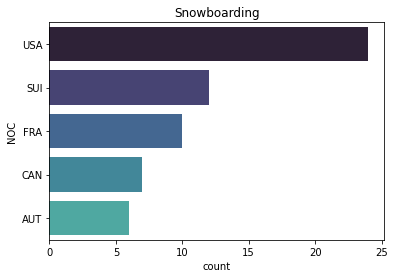

In [32]:
top_sport('Snowboarding') #Medallas totales por Comité Olímpico Nacional

Se crea la función top_sport_winter_games tomando como base la función top_sport, en el cual se toma en cuenta el género (másculino/femenino) y las medallas (Total/Oro/Plata/Bronce), así como el deporte invernal. Con esto, se observará con mejor detalle el rendimiento de los países en diferentes aspectos. Se debe recordar que estos datos son hasta los juegos de Sochi 2014.

In [33]:
def top_sport_winter_games(sport, gender, medal):
    if gender == 'Overall' and medal == 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Sport'] == sport]
    if gender != 'Overall' and medal == 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Sport'] == sport]
        selected_df = selected_df[selected_df['Sex'] == gender]
    if gender == 'Overall' and medal != 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Sport'] == sport]
        selected_df = selected_df[selected_df['Medal'] == medal]
    if gender != 'Overall' and medal != 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Sport'] == sport]
        selected_df = selected_df[selected_df['Sex'] == gender]
        selected_df = selected_df[selected_df['Medal'] == medal]

    fig, ax = plt.subplots(1,1, figsize=(10,4), facecolor='azure')
    ax.set_facecolor('azure')
    ax.set_axisbelow(True)

    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_ylabel("Country",fontfamily='monospace',loc='bottom',color='gray')
    ax.set_xlabel("Total Medals",fontfamily='monospace',loc='center',color='gray')
    
    ax.set_title('Top 5 countries in: '+ sport +', Gender: ' + gender +', Medal: ' + medal, fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
    
    counted_df_index = selected_df['Country'].value_counts().index[0:5]
    selected_df = selected_df[selected_df['Country'].isin(counted_df_index)]
    sns.countplot(y="Country", data=selected_df, order=counted_df_index, palette=sns.color_palette("mako"))

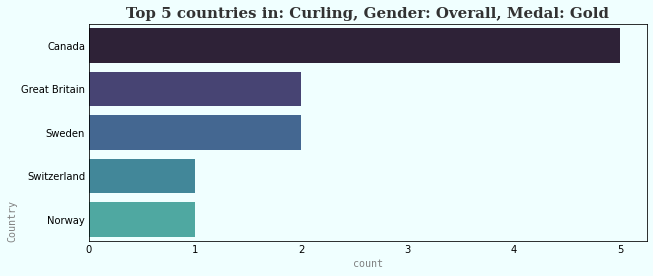

In [34]:
top_sport_winter_games('Curling','Overall','Gold')

En esta oprtunidad, la función sport_years grafica el comportamiento de las disciplinas olímpicas a lo largo del tiempo, destacando los 5 países con mejores resultados.

In [35]:
def sport_years(sport):
    selected_df = winter[winter['Sport'] == sport]
    years = selected_df['Year'].sort_values().unique()
    default_medal_df = pd.DataFrame(columns=['Year', 'Medal_Num'])
    default_medal_df['Year'] = years
    default_medal_df['Medal_Num'] = 0
    default_medal_df = default_medal_df.set_index('Year')
    selected_country = selected_sport_country[sport]
    
    counted_df_index = selected_df['Country'].value_counts().index[0:5]
    selected_df = selected_df[selected_df['Country'].isin(counted_df_index)]
    
    counted_df_index
    
    fig, ax = plt.subplots(1,1, figsize=(10,4), facecolor='azure')
    ax.set_facecolor('azure')
    ax.set_axisbelow(True)

    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_ylabel("Total Medals",fontfamily='monospace',loc='bottom',color='gray')
    ax.set_xlabel("")
    
    ax.set_title('Top 5 countries in '+ sport, fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
        
    for team in selected_df['Country'].unique():
        temp_df = selected_df[selected_df['Country'] == team]
        temp_df['Medal_Num'] = 1
        temp_group_df = temp_df.groupby(['Year']).sum()
        temp_group_df = temp_group_df.reset_index()
        temp_group_df = temp_group_df[['Year', 'Medal_Num']]
        temp_group_df = temp_group_df.set_index('Year')

        olympics_df = temp_group_df.add(default_medal_df, fill_value=0)
        
        if team == selected_country:
            sns.lineplot(data=olympics_df, x=olympics_df.index, y="Medal_Num", label=team, linewidth=5) 
            #Aplica SOLO si se quere analizar Rusia
            #plt.axvline(1988, color='r')
            #plt.axvline(1992, color='g')
            #plt.axvline(1994, color='b')
        else:
            sns.lineplot(data=olympics_df, x=olympics_df.index, y="Medal_Num", label=team, alpha=0.7, linewidth=2, markers=True, dashes=False)

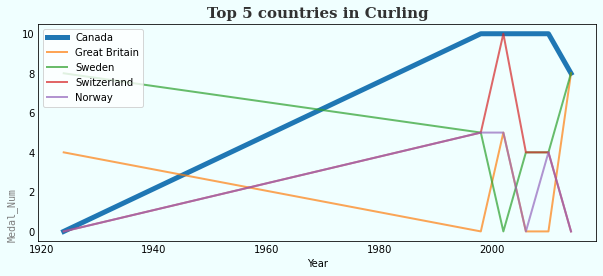

In [36]:
sport_years('Curling')

**2. RENDIMIENTO POR PAÍS**

Las funciones mencionadas a continuación: fetch_medal_tally_winter y fetch_medal_tally_summer se implementaron para conocer la cantidad de medallas de cada NOC a lo largo de la historia de los Juegos Olímpicos de Verano e Invierno. Esto con el fin de determinar qué NOC son especialistas en deportes de verano e invierno.

In [37]:
def fetch_medal_tally_winter(year,noc):
    flag = 0
    if year == 'Overall'and noc == 'Overall':
        temp_df = countMedal_winter #summer.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    if year =='Overall' and noc != 'Overall':
        flag = 1
        temp_df = countMedal_winter[countMedal_winter['NOC'] == noc]
    if year !='Overall' and noc == 'Overall':
        temp_df = countMedal_winter[countMedal_winter['Year'] == int(year)]
    if year !='Overall' and noc != 'Overall':
        temp_df = countMedal_winter[(countMedal_winter['Year'] == int(year)) & (countMedal_winter['NOC'] == noc)]
    
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False).reset_index()
        
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']
    
    print(x)

In [38]:
fetch_medal_tally_winter(year='1924',noc='Overall') 

    NOC  Gold  Silver  Bronze  Total
0   FIN     4       4       3     11
1   NOR     4       7       6     17
2   AUT     2       1       0      3
3   GBR     2       1       2      5
4   SUI     2       0       1      3
5   AUS     1       0       0      1
6   CAN     1       0       0      1
7   IND     1       0       0      1
8   NEP     1       0       0      1
9   SWE     1       1       0      2
10  USA     1       2       1      4
11  BEL     0       0       1      1
12  FRA     0       0       3      3


In [39]:
fetch_medal_tally_winter(year='2010',noc='CAN')

   NOC  Gold  Silver  Bronze  Total
0  CAN    14       7       5     26


In [40]:
fetch_medal_tally_winter(year='Overall',noc='CHN')

   Year  Gold  Silver  Bronze  Total
0  1992     0       3       0      3
1  1994     0       1       2      3
2  1998     0       6       2      8
3  2002     2       2       4      8
4  2006     2       4       5     11
5  2010     5       2       4     11
6  2014     3       4       2      9


In [41]:
def fetch_medal_tally_summer(year,noc):
    flag = 0
    if year == 'Overall'and noc == 'Overall':
        temp_df = countMedal_summer #summer.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    if year =='Overall' and noc != 'Overall':
        flag = 1
        temp_df = countMedal_summer[countMedal_summer['NOC'] == noc]
    if year !='Overall' and noc == 'Overall':
        temp_df = countMedal_summer[countMedal_summer['Year'] == int(year)]
    if year !='Overall' and noc != 'Overall':
        temp_df = countMedal_summer[(countMedal_summer['Year'] == int(year)) & (countMedal_summer['NOC'] == noc)]
    
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False).reset_index()
        
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']
    
    print(x)

In [42]:
resume_summer = fetch_medal_tally_summer(year='Overall',noc='AUT')
resume_summer

    Year  Gold  Silver  Bronze  Total
0   1896     2       1       2      5
1   1900     0       3       3      6
2   1904     2       1       1      4
3   1906     3       3       3      9
4   1908     0       0       1      1
5   1912     0       2       2      4
6   1924     0       3       1      4
7   1928     3       0       1      4
8   1932     1       1       3      5
9   1936     5       7       5     17
10  1948     2       2       4      8
11  1952     0       1       1      2
12  1956     0       0       2      2
13  1960     1       1       0      2
14  1968     0       2       2      4
15  1972     0       1       2      3
16  1976     0       0       1      1
17  1980     1       2       1      4
18  1984     1       1       1      3
19  1988     1       0       0      1
20  1992     0       2       0      2
21  1996     0       1       2      3
22  2000     2       1       0      3
23  2004     2       4       1      7
24  2008     0       1       2      3
25  2016    

A continuación, se presentan las funciones noc_winter_games y noc_winter.

La primera de ellas es usada para recabar las medallas ganadas por los NOC participantes de los WOG. Se tiene la opción de seleccionar por medalla ganada y por género. Estos resultados serán usados para graficar el porcentaje de medallas ganadas.

Por su parte, la segunda es usada para conocer la distribución de las medallas ganadas en las disciplinas olímpicas de invierno.

In [43]:
def noc_winter_games(noc, gender, medal):
    if gender == 'Overall' and medal == 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Country'] == noc]
    if gender != 'Overall' and medal == 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Country'] == noc]
        selected_df = selected_df[selected_df['Sex'] == gender]
    if gender == 'Overall' and medal != 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Country'] == noc]
        selected_df = selected_df[selected_df['Medal'] == medal]
    if gender != 'Overall' and medal != 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Country'] == noc]
        selected_df = selected_df[selected_df['Sex'] == gender]
        selected_df = selected_df[selected_df['Medal'] == medal]  
    
    counted_df_index = selected_df['Country'].value_counts().index[0:5]
    selected_df = selected_df[selected_df['Country'].isin(counted_df_index)]
    
    return selected_df

In [44]:
ns = noc_winter_games('Latvia', 'Overall', 'Overall')
noc_sport = ns.groupby('Sport').count()['Medal'].reset_index().sort_values('Medal', ascending=False)
noc_sport

,Sport,Medal
1,Luge,4
2,Skeleton,2
0,Bobsleigh,1


In [45]:
def noc_winter(noc, gender):
    if gender == 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Country'] == noc]
    if gender != 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Country'] == noc]
        selected_df = selected_df[selected_df['Sex'] == gender]
    
    counted_df_index = selected_df['Country'].value_counts().index[0:5]
    selected_df = selected_df[selected_df['Country'].isin(counted_df_index)]
    
    return selected_df

In [46]:
w = noc_winter('Sweden', 'Overall')
winterNOC = w.groupby('Sport').sum()[['Gold','Silver','Bronze']].reset_index() #.sort_values('Gold', ascending=False)
winterNOC['Total'] = winterNOC['Gold'] + winterNOC['Silver'] + winterNOC['Bronze']
winterNOC = winterNOC.sort_values('Gold', ascending=False)
winterNOC

,Sport,Gold,Silver,Bronze,Total
2,Cross Country Skiing,29,22,23,74
10,Speed Skating,7,4,5,16
0,Alpine Skiing,5,2,9,16
1,Biathlon,3,1,6,10
3,Curling,2,2,2,6
4,Figure Skating,2,1,1,4
6,Ice Hockey,2,4,5,11
5,Freestyle Skiing,0,1,1,2
7,Nordic Combined,0,1,1,2
8,Ski Jumping,0,1,1,2


Se realiza el mismo procedimiento con los Juegos de Verano en noc_summer.

In [47]:
def noc_summer(noc, gender):
    if gender == 'Overall':
        selected_df = countMedal_summer[countMedal_summer['Country'] == noc]
    if gender != 'Overall':
        selected_df = countMedal_summer[countMedal_summer['Country'] == noc]
        selected_df = selected_df[selected_df['Sex'] == gender]
    
    counted_df_index = selected_df['Country'].value_counts().index[0:5]
    selected_df = selected_df[selected_df['Country'].isin(counted_df_index)]
    
    return selected_df

In [48]:
s = noc_summer('Sweden', 'Overall')
summerNOC = s.groupby('Sport').sum()[['Gold','Silver','Bronze']].reset_index() #.sort_values('Gold', ascending=False)
summerNOC['Total'] = summerNOC['Gold'] + summerNOC['Silver'] + summerNOC['Bronze']
summerNOC = summerNOC.sort_values('Gold', ascending=False)
#summerNOC

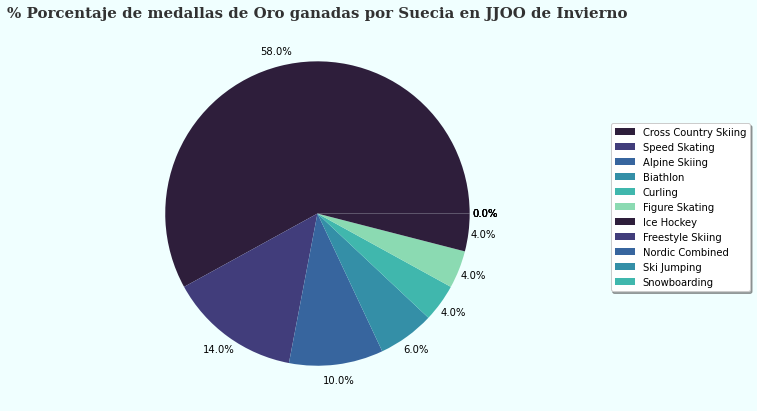

In [49]:
fig, ax = plt.subplots(1,1, figsize=(15,7), facecolor='azure')
ax.set_facecolor('azure')
ax.set_axisbelow(True)

ax.tick_params(axis=u'both', which=u'both',length=0)
#ax.set_ylabel("NOC",fontfamily='monospace',loc='bottom',color='gray')
#ax.set_xlabel("Total Medals",fontfamily='monospace',loc='center',color='gray')

ax.set_title('% Porcentaje de medallas de Oro ganadas por Suecia en JJOO de Invierno', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')

#Cambiar Gold por Total para graficar el porcentaje de medallas totales
plt.pie(winterNOC['Gold'], colors = sns.color_palette('mako'), autopct='%1.1f%%',pctdistance=1.1)
plt.legend(labels=winterNOC['Sport'], loc='best', bbox_to_anchor=(0.9, 0., 0.75, 0.75), shadow=True) 
plt.show()

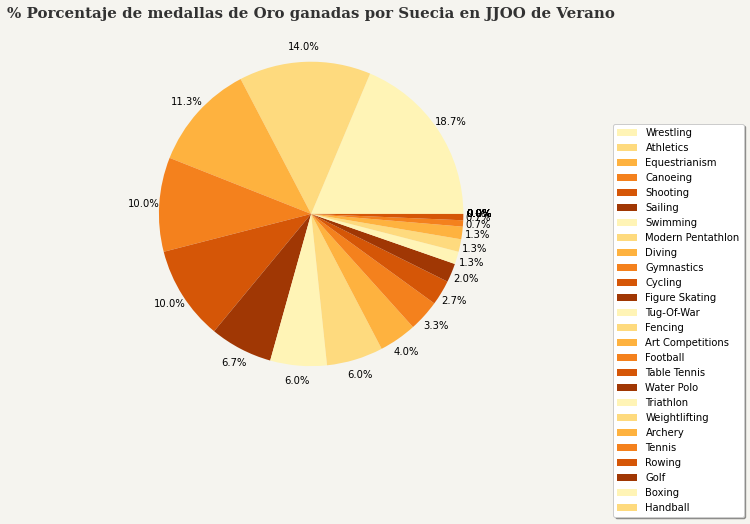

In [50]:
fig, ax = plt.subplots(1,1, figsize=(15,7), facecolor='#F5F4EF')
ax.set_facecolor('#F5F4EF')
ax.set_axisbelow(True)

ax.tick_params(axis=u'both', which=u'both',length=0)
#ax.set_ylabel("NOC",fontfamily='monospace',loc='bottom',color='gray')
#ax.set_xlabel("Total Medals",fontfamily='monospace',loc='center',color='gray')

ax.set_title('% Porcentaje de medallas de Oro ganadas por Suecia en JJOO de Verano', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')

#Cambiar Gold por Total para graficar el porcentaje de medallas totales
plt.pie(summerNOC['Gold'], colors = sns.color_palette('YlOrBr'), autopct='%1.1f%%',pctdistance=1.1) #Oranges
plt.legend(labels=summerNOC['Sport'], loc='best', bbox_to_anchor=(0.9, 0., 0.75, 0.75), shadow=True) 
plt.show()

https://seaborn.pydata.org/tutorial/color_palettes.html

**3. RENDIMIENTO DE LOS PAÍSES ANFITRIONES**

A continuación, se analiza el comportamiento de los países anfitriones de los Juegos Olímpicos de Invierno con el fin de determinar si el ser anfitrión implica una mayor cantidad de medallas ganadas. De la misma manera, puede servir para conocer qué tan bien le irá a China en 2022.

Se empiza creando una función la cual agrupa las sedes olímpicas con los países (o NOC) que fueron sedes de WOC. Posteriormente, se aplica dicha función al dataset de invierno.

In [51]:
winter_city = countMedal_winter.copy()
def host_country(col):
    if col == "Chamonix" or col == "Grenoble" or col == "Albertville":
        return "France"  #"FRA"
    elif col == "Sankt Moritz":
        return "Switzerland"  #"SUI"
    elif col == "Lake Placid" or col == "Salt Lake City" or col == "Squaw Valley":
        return  "United States of America"
    elif col == "Garmisch-Partenkirchen":
        return  "Germany"  #"GER"
    elif col == "Oslo" or col == "Lillehammer":
        return  "Norway"   #"NOR"
    elif col == "Innsbruck":
        return  "Austria"  #"AUT"
    elif col == "Sapporo" or col == "Nagano":
        return  "Japan"  #"JPN"
    elif col == "Sarajevo":
        return  "Serbia"  #"YUG"
    elif col == "Calgary" or col == "Vancouver":
        return  "Canada"  #"CAN"
    elif col == "Cortina d'Ampezzo" or col == "Torino":
        return  "Italy"   #"ITA"
    elif col == "Sochi":
        return  "Russia"  #"RUS"
    elif col == "Pyeongchang":
        return  "South Korea"  #"KOR"
    else:
        return "Other"


# Applying this function

winter_city['Host_Country'] = winter_city['City'].apply(host_country)

En este paso, se agrupa el dataset winter_city por medalla y se cuenta el número todal de preseas ganadas. Posteriormente, con el comando np.where se comapra el país sede con la ciudad sede (ver la función host_country), para mas tarde usarlo para una posterior gráfica.

In [52]:
df_new = winter_city.groupby(['Year','Host_Country','Country','Medal'])['Medal'].count().unstack().fillna(0).astype(int).reset_index()

df_new['Is_Host'] = np.where(df_new['Host_Country'] == df_new['Country'],1,0)
df_new['Total'] = df_new['Bronze'] + df_new['Silver'] + df_new['Gold']
#df_new.tail(190)

El resultado anterior es con el dataset de los JJOO hasta Sochi 2014 (Invierno). Se desea agregar el medallero de Pyeongchang 2018. Para ello, se usa el dataset respectivo (representado en medal_2018) y se aplica el mismo procedimiento de comparación entre ciudad sede y país anfritrión. Hecho este paso, se agrega el resultado en el dataframe df_new.

In [53]:
df_winter_full_refined = medal_2018[['Country', "Gold", "Silver", "Bronze", "Total"]]
#df_21_full_refined['Total Medals'] = df_21_full_refined[["Gold Medal", "Silver Medal", "Bronze Medal"]].sum(axis=1)
df_winter_full_refined['Year'] = 2018

df_winter_full_refined['Is_Host'] = np.where(df_winter_full_refined['Country'] == 'South Korea',1,0)
df_winter_full_refined['Host_Country'] = 'South Korea'
#df_winter_full_refined.head(25)

# Adding 2018 data to historic
df_new = df_new.append(df_winter_full_refined)

# Removing Russia as many Olympic games were competed in as the Soviet Union, containing several modern day nations

df_new = df_new.query("Country != 'Russia' | Country != 'Soviet Union'") #df_new = df_new.query("NOC != 'RUS' | NOC != 'URS'") Olympic Athletes from Russia
#df_new.tail(51)

Ya obtenido el dataframe deseado, lo siguiente será graficar las medallas totales ganadas por los NOC en los WOG (en verde) con las medallas ganadas por los países anfitriones (en rojo). 

Como primera impresión, no podemos determinar a simple vista si ser anfitrión representa una ventaja en cuanto a las medallas ganadas totales. Falta realizar más pruebas.

findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans.


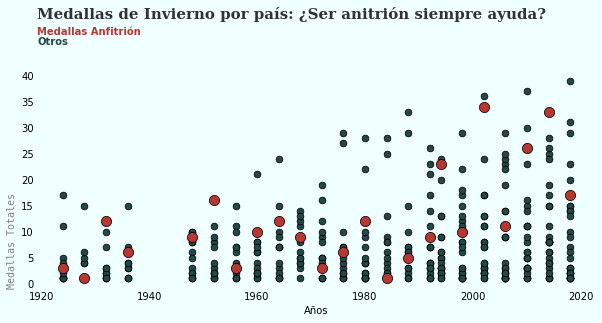

In [54]:
fig, ax = plt.subplots(1,1, figsize=(10,4), facecolor='azure')

sns.scatterplot(data=df_new.query("Is_Host == 0"), x='Year', y='Total', s=45, ec='black', color='#244747',ax=ax)
sns.scatterplot(data=df_new.query("Is_Host == 1"), x='Year', y='Total', s=105, ec='black', color='#B73832',ax=ax)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("Medallas Totales",fontfamily='monospace',loc='bottom',color='gray')
ax.set_xlabel("Años")

ax.set_facecolor('azure')
ax.set_axisbelow(True)


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    

ax.text(Xstart,Yend+10, 'Medallas de Invierno por país: ¿Ser anitrión siempre ayuda?', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend+7, 'Medallas Anfitrión', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(Xstart,Yend+5, 'Otros', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#244747')

plt.show()

Igual resultado se produce si se grafica el total de oros ganados de los países anfitriones respecto al resto de países participantes.

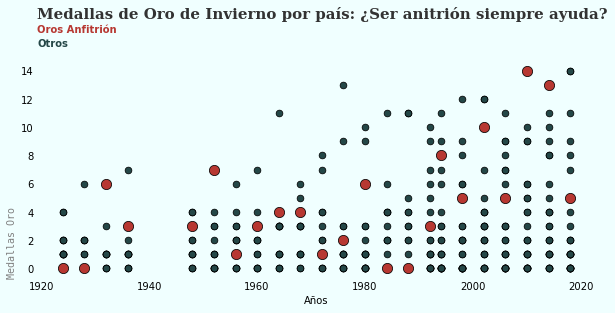

In [55]:
fig, ax = plt.subplots(1,1, figsize=(10,4), facecolor='azure')

sns.scatterplot(data=df_new.query("Is_Host == 0"), x='Year', y='Gold', s=45, ec='black', color='#244747',ax=ax)
sns.scatterplot(data=df_new.query("Is_Host == 1"), x='Year', y='Gold', s=105, ec='black', color='#B73832',ax=ax)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("Medallas Oro",fontfamily='monospace',loc='bottom',color='gray')
ax.set_xlabel("Años")

ax.set_facecolor('azure')
ax.set_axisbelow(True)


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    

ax.text(Xstart,Yend+3, 'Medallas de Oro de Invierno por país: ¿Ser anitrión siempre ayuda?', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend+2, 'Oros Anfitrión', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(Xstart,Yend+1, 'Otros', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#244747')

plt.show()

Una prueba más efectiva para determinar si los países anfitriones mejoran su desempeño en WOG es promediar las medallas totales ganadas en las ediciones de los Juegos (resaltado en verde navidad) y compararlas con las veces en que han sido anfitriones (en rojo navidad). 

De acuerdo a la gráfica, hay países que mejoraron su rendimiento cuando fueron anfitriones y otros que no. Respecto a las países que no superaron el promedio, una posible razón se deba a que las primeras ediciones había pocos deportes (en concreto 10 deportes en 1924) y por ende repartieron 54 medallas. 

findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans.


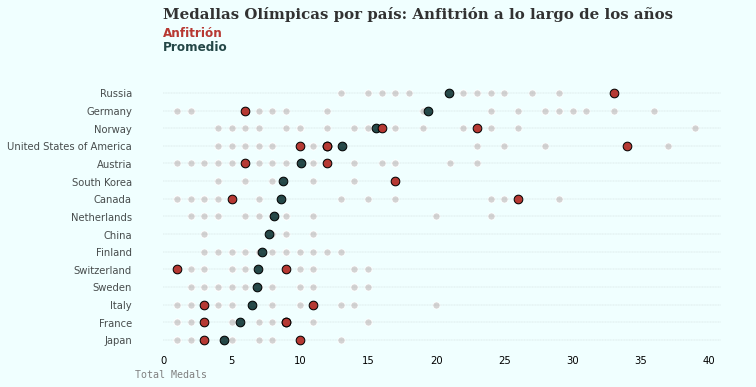

In [56]:
fig, ax = plt.subplots(1,1, figsize=(11, 5), facecolor='azure')

# top 20
top_list_ = df_new.groupby('Country')['Total'].mean().sort_values(ascending=False).reset_index()[:15].sort_values(by='Total',ascending=True)
top_list_.head(15)

plot = 1
for country in top_list_['Country']:
    mean = df_new[df_new['Country'] == country].groupby('Country')['Total'].mean()
    # historic scores
    sns.scatterplot(data=df_new[df_new['Country'] == country], y=plot, x='Total',color='lightgray',s=50,ax=ax)
    # mean score
    sns.scatterplot(data=df_new[df_new['Country'] == country], y=plot, x=mean,color='#244747',ec='black',linewidth=1,s=75,ax=ax)
    # Hosting score
    sns.scatterplot(data=(df_new[(df_new['Country'] == country) & (df_new['Is_Host'] == 1)]), y=plot, x='Total',color='#B73832',ec='black',linewidth=1,s=75,ax=ax)   
    plot += 1

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['Country'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Total Medals",fontfamily='monospace',loc='left',color='gray')
ax.set_facecolor('azure')
ax.hlines(y=top_list_.index+1, xmin=0, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)


ax.text(0,Yend+3.5, 'Medallas Olímpicas por país: Anfitrión a lo largo de los años', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(0,Yend+2.5, 'Anfitrión', fontsize=12,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(0,Yend+1.7, 'Promedio', fontsize=12,fontweight='bold',fontfamily='sansserif',color='#244747')


plt.show()

Aquí se muestra los deportes que estuvieron en los primeros JJOO, en 1924. De igual manera, el hecho de que se haya incluido más deportes al programa olímpico, implica una mayor cantidad de medallas a repartir. 

In [57]:
aux_year = winter.query("Year == 1924")
aux_year['Sport'].unique()

array(['Ice Hockey', 'Curling', 'Bobsleigh', 'Military Ski Patrol',
       'Figure Skating', 'Ski Jumping', 'Alpinism',
       'Cross Country Skiing', 'Nordic Combined', 'Speed Skating'],
      dtype=object)

Sobre este punto, queremos comparar las medallas de oro ganadas por los países que han sido sedes de WOG en este siglo. A saber: Salt Lake City, Turín, Vancouver, Sochi y Pyeongchang. Se calcula el promedio de las doradas ganadas y posteriormente, se compara con las medallas de oro obtenidas cuando fueron anfitrionas olímpicas.

In [58]:
temp = winter_city.query("Year >= 2002")
temp['Year'].unique()

df_new_5 = temp.groupby(['Year','Host_Country','Country','Medal'])['Medal'].count().unstack().fillna(0).astype(int).reset_index()

# Adding 2018 data to historic
df_new_5 = df_new_5.append(df_winter_full_refined)

# Removing Russia as many Olympic games were competed in as the Soviet Union, containing several modern day nations

df_new_5 = df_new_5.query("Country != 'Russia' | Country != 'Soviet Union'") #df_new = df_new.query("NOC != 'RUS' | NOC != 'URS'") Olympic Athletes from Russia

df_new_5['Is_Host'] = np.where(df_new_5['Host_Country'] == df_new_5['Country'],1,0)
df_new_5['Total'] = df_new_5['Bronze'] + df_new_5['Silver'] + df_new_5['Gold']

#df_new_5.head(10)
sample = df_new_5.groupby(['Country','Is_Host'])['Gold'].mean().unstack().dropna()     #Cambiar Gold por Total para las medallas totales
sample = sample.rename(columns={0 : "Not Hosting", 1 : "Hosting"})
sample = sample.reset_index().query("Country == 'South Korea' | Country == 'Russia' | Country == 'Canada' | Country == 'Italy' | Country == 'United States of America' ").set_index('Country')
sample.style.set_caption("Medallas de oro en WOG de los últimos 5 países anfitriones").set_precision(2).background_gradient()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


Is_Host,Not Hosting,Hosting
Country,,
Canada,8.75,14.00
Italy,2.00,5.00
Russia,4.50,13.00
South Korea,4.25,5.00
United States of America,9.00,10.00


Con la tabla anterior, se procede a graficar el resultado. Observando en detalle, se aprecia que en todos los casos hubo un aumento de medallas de oro ganadas cuando el país fue anfitrión de WOG. Destaca el caso de Rusia, que en los juegos de Sochi aumentó de forma considerable los oros logrados.

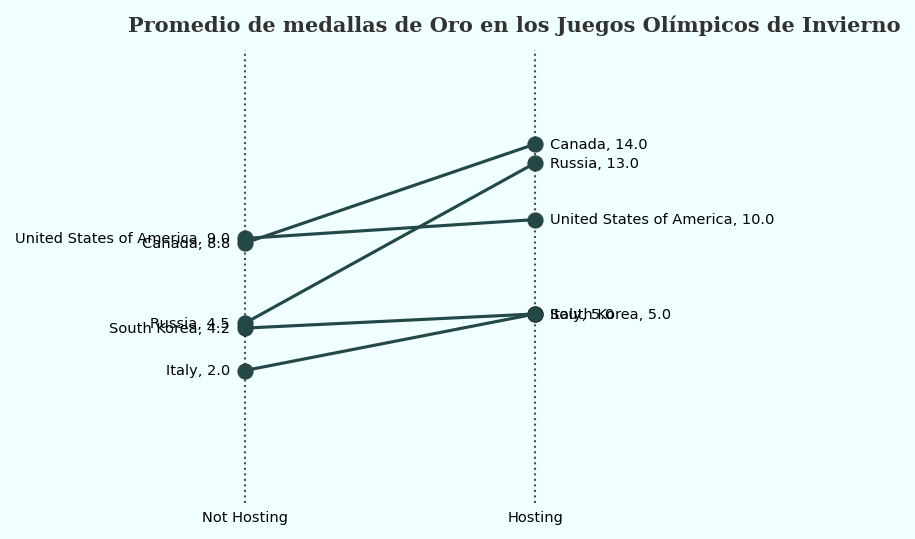

In [59]:
import matplotlib.lines as mlines

low_c = '#B73832'
high_c = '#244747'

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(sample.index, sample['Not Hosting'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(sample.index, sample['Hosting'])]
klass = [low_c if (y1-y2) < 0 else high_c for y1, y2 in zip(sample['Not Hosting'], sample['Hosting'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=low_c if p1[1]-p2[1] > 0 else high_c, marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(5,4), dpi= 150, facecolor='azure')

ax.set_facecolor('azure')
ax.vlines(x=1, ymin=-5, ymax=80, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=-5, ymax=80, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=sample['Not Hosting'], x=np.repeat(1, sample.shape[0]), s=40,linewidth=1.5, color='black', alpha=0.7)
ax.scatter(y=sample['Hosting'], x=np.repeat(3, sample.shape[0]), s=40, linewidth=1.5,color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(sample['Not Hosting'], sample['Hosting'], sample.index):
    newline([1,p1], [3,p2])
    ax.text(1-0.1, p1, c + ', ' + str(round(p1,1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':7})
    ax.text(3+0.1, p2, c + ', ' + str(round(p2,1)), horizontalalignment='left', verticalalignment='center', fontdict={'size':7})


ax.text(0.2,20,"Promedio de medallas de Oro en los Juegos Olímpicos de Invierno", fontsize=10,fontweight='bold',fontfamily='serif',color='#323232')

ax.set(xlim=(0,4), ylim=(-5,sample.max().max()+5), ylabel='') #ylim=(), 
ax.set_xticks([1,3])
ax.set_xticklabels(["Not Hosting", "Hosting"],fontsize=7)
#ax.xaxis.tick_top()

for s in ["top","right","left","bottom"]:
    ax.spines[s].set_visible(False)
    
ax.tick_params(axis='both',which='both',length=0,labelleft=False) 
plt.rcParams["font.family"] = "monospace"

plt.show()

https://www.gracenote.com/virtual-medal-table/

In [60]:
#Cambiar Total por Gold en la línea de abajo para las medallas totales
sample_t = df_new.groupby(['Country','Is_Host'])['Total'].mean().unstack().dropna()  
sample_t = sample_t.rename(columns={0 : "Not Hosting", 1 : "Hosting"})
sample_t = sample_t.reset_index().query("Country == 'Russia' | Country == 'Canada' | Country == 'Italy' | Country == 'United States of America' | Country == 'Japan' | Country == 'Norway' | Country == 'France' | Country == 'Switzerland' | Country == 'Serbia' | Country == 'Austria' | Country == 'Germany' | Country == 'South Korea'").set_index('Country')
sample_t.style.set_caption("Medallas de oro en WOG de los países anfitriones").set_precision(2).background_gradient()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """


Is_Host,Not Hosting,Hosting
Country,,
Austria,10.19,9.00
Canada,8.00,15.50
France,5.42,7.00
Germany,20.10,6.00
Italy,6.47,7.00
Japan,4.09,6.50
Norway,15.19,19.50
Russia,20.19,33.00
Serbia,3.00,1.00


Ahora se procede a graficar el medallero histórico de determinados países, haciendo énfasis (si lo amerita) cuando fueron anfitriones. 

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans.


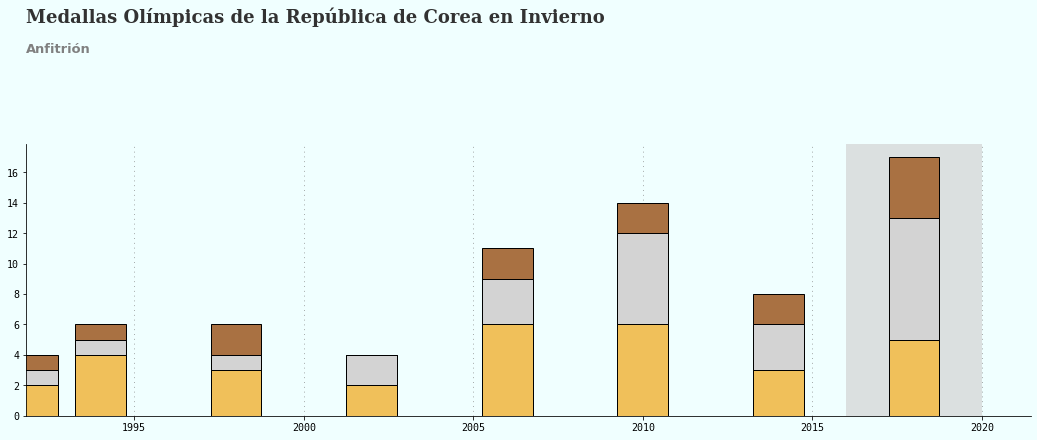

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor='azure')

ax.set_facecolor('azure')

color = ["#a97142", "lightgray", '#f0c05a']
medals_list = ['Bronze', 'Silver', 'Gold']

# Host years US
#ax.axvspan(1930,1934, facecolor='lightgray',alpha=0.7)
#ax.axvspan(1958,1962, facecolor='lightgray',alpha=0.7)
#ax.axvspan(1978,1982, facecolor='lightgray',alpha=0.7)
#ax.axvspan(2000,2004, facecolor='lightgray',alpha=0.7)

#Host Years IT
#ax.axvspan(1954,1958, facecolor='lightgray',alpha=0.7)
#ax.axvspan(2004,2008, facecolor='lightgray',alpha=0.7)

#Host Years CA
#ax.axvspan(1986,1990, facecolor='lightgray',alpha=0.7)
#ax.axvspan(2008,2012, facecolor='lightgray',alpha=0.7)

#Host Years RU
#ax.axvspan(2012,2016, facecolor='lightgray',alpha=0.7)

#Host years KR
ax.axvspan(2016,2020, facecolor='lightgray',alpha=0.7)


for i, medal in enumerate(medals_list):
    temp = df_new.query("Country == 'South Korea'").groupby(['Year'])['Gold','Silver','Bronze'].sum().cumsum(axis=1)[medal]
    ax.bar(temp.index, temp, color=color[i],width=1.5,ec='black')
    

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart+2,Yend+8, 'Medallas Olímpicas de la República de Corea en Invierno', fontsize=18,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart+2,Yend+6, 'Anfitrión', fontsize=13,fontweight='bold',fontfamily='sansserif',color='gray')

ax.set_xlim(Xstart+2, Xend)
ax.grid(which='both', axis='x', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
plt.show()

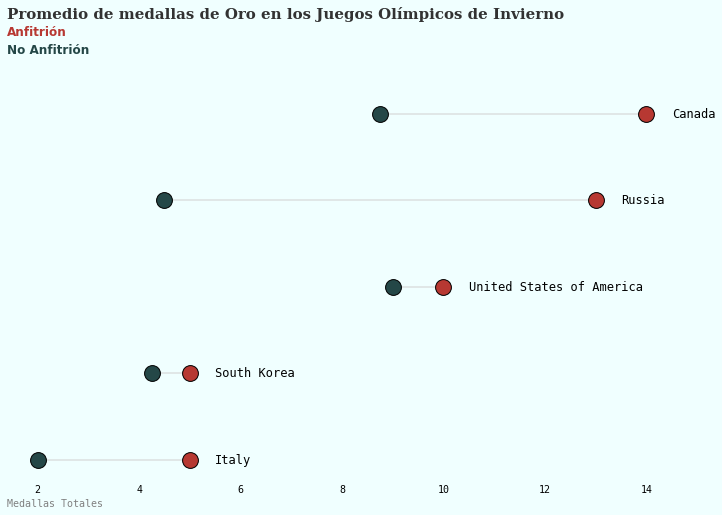

In [62]:
fig, ax = plt.subplots(1,1, figsize=(12,7), facecolor='azure')

value1= sample['Not Hosting']
value2=sample['Hosting']

ordered_df = sample.sort_values(by='Hosting', ascending=True)
my_range=range(1,len(ordered_df.index)+1)

plt.hlines(y=my_range, xmin=ordered_df['Not Hosting'], xmax=ordered_df['Hosting'], color='lightgray', alpha=0.7,zorder=1)
plt.scatter(ordered_df['Not Hosting'], my_range, color='#244747', alpha=1, ec='black',label='Not Hosting',s=250)
plt.scatter(ordered_df['Hosting'], my_range, color='#B73832', alpha=1 , ec='black', label='Hosting',s=250)

for i in range(0,5):
    ax.annotate(ordered_df.index[i], 
                   xy=((ordered_df[["Not Hosting", "Hosting"]].max(axis=1)[i]+0.5),i+1), 
                   va = 'center', ha='left',fontweight='light', fontfamily='monospace',fontsize=12, color='black',rotation=0)

ax.axes.get_yaxis().set_ticks([])

for s in ['top','left', 'bottom', 'right']:
    ax.spines[s].set_visible(False)
    
ax.set_facecolor('azure')    
ax.set_xlabel("Medallas Totales",fontfamily='monospace',loc='left',color='gray')
ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 
ax.set_yticklabels([])
    
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+0.9, 'Promedio de medallas de Oro en los Juegos Olímpicos de Invierno', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend+0.7, 'Anfitrión', fontsize=12,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(Xstart,Yend+0.5, 'No Anfitrión', fontsize=12,fontweight='bold',fontfamily='sansserif',color='#244747')

plt.show()

**4. PARTICIPACIÓN FEMENINA EN WOG**

Antes de trabajar en la participación de los atletas en WOG, se realiza una depuración de los atletas duplicados en una misma edición de los juegos de invierno. Si tomamos el caso de que un atleta participa en distintos eventos de un mismo deporte (por ejemplo Biatlón), se debe descartar su inclusión en el contador de atletas participantes ya que se estaría, por lo menos, duplicando su participacíon.

In [63]:
hola = df_winter.drop_duplicates(subset=['Name', 'Year'], keep='last')
hola.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28586 entries, 5 to 271115
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       28586 non-null  int64  
 1   Name     28586 non-null  object 
 2   Sex      28586 non-null  object 
 3   Age      28586 non-null  float64
 4   Height   28586 non-null  float64
 5   Weight   28586 non-null  float64
 6   Team     28586 non-null  object 
 7   NOC      28586 non-null  object 
 8   Games    28586 non-null  object 
 9   Year     28586 non-null  int64  
 10  Season   28586 non-null  object 
 11  City     28586 non-null  object 
 12  Sport    28586 non-null  object 
 13  Event    28586 non-null  object 
 14  Medal    4249 non-null   object 
 15  Country  28586 non-null  object 
 16  Notes    389 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 3.9+ MB


Se crean dos nuevos dataframe que contengan la información de las (los) atletas participantes en Juegos Olímpicos de Invierno. Igualmente, se crearán otros dos dataframes con las (los) medallistas en este gran evento.

In [64]:
#Atletas femeninas en JJOO Invierno
womenOlympics = hola[(hola.Sex=='F') & (hola.Season=='Winter')]

#Dataset medallistas femeninas
womenMedal = winter[(winter.Sex=='F')] #womenMedal = countMedal_winter[(countMedal_winter.Sex=='F')]

#Atletas masculinos en JJOO Invierno
menOlympics = hola[(hola.Sex=='M') & (hola.Season=='Winter')]

#Dataset medallistas masculinos
menMedal = winter[(winter.Sex=='M')] #menMedal = countMedal_winter[(countMedal_winter.Sex=='M')]

Una vez obtenido los dataframes, se grafica la participación de los atletas masculinos y femeninos en los Juegos de Invierno por medio de una gráfica lineal.

<AxesSubplot:title={'center':'Participación femenina y masculina en Juegos Olímpicos de Invierno'}, xlabel='Year', ylabel='Athletes'>

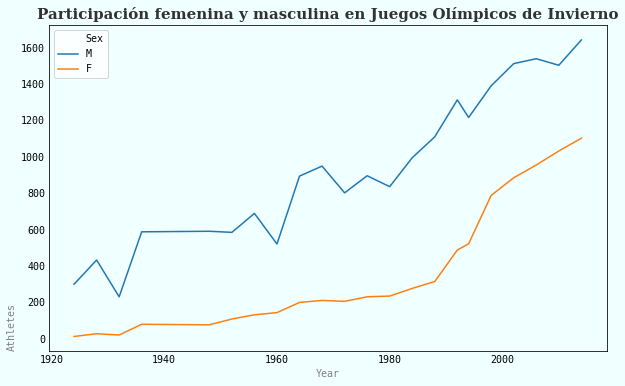

In [65]:
fig, ax = plt.subplots(1,1, figsize=(10,6), facecolor='azure')
ax.set_facecolor('azure')
ax.set_axisbelow(True)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("Atletas",fontfamily='monospace',loc='bottom',color='gray')
ax.set_xlabel("Años",fontfamily='monospace',loc='center',color='gray')

ax.set_title('Participación femenina y masculina en Juegos Olímpicos de Invierno', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')

women_men = hola.groupby('Year')['Sex'].value_counts().rename("Athletes").reset_index() #games[season].groupby(["Year","Sex"]).ID.count().rename("Count").reset_index()
sns.lineplot(data = women_men,x = 'Year',y = 'Athletes',hue = 'Sex')

Se muestra un aumento progresivo en la particiación femenina a partir de los juegos de 1992 (Francia), aunque la diferencia respecto a la masculina es evidente. Ahora, para saber cuánto ha disminuido la brecha entre mujeres y hombres, se realiza la gráfica abajo. Esta muestra la proporción histórica de mujeres respecto a hombres. Hasta Sochi 2014, la relación entre hombres y mujeres era de 1,41 a 1, ver tabla _final_.

<AxesSubplot:title={'center':'Ratio de participación femenina y masculina en los Juegos Olímpicos de Invierno'}, xlabel='Year', ylabel='Ratio'>

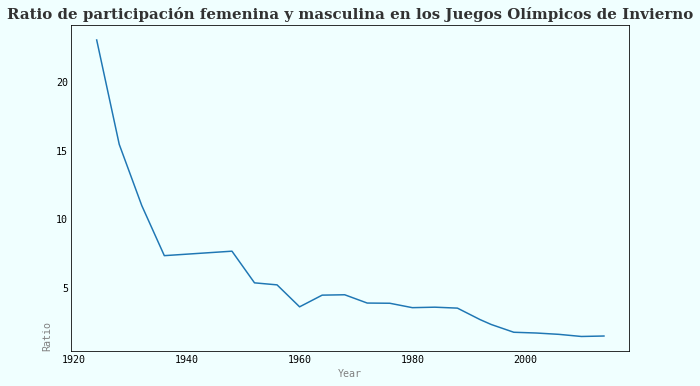

In [66]:
fig, ax = plt.subplots(1,1, figsize=(10,6), facecolor='azure')
ax.set_facecolor('azure')
ax.set_axisbelow(True)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("Ratio",fontfamily='monospace',loc='bottom',color='gray')
ax.set_xlabel("Year",fontfamily='monospace',loc='center',color='gray')

ax.set_title('Ratio de participación femenina y masculina en los Juegos Olímpicos de Invierno', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')

women_men = women_men.pivot(index="Year", columns="Sex", values="Athletes")
women_men["Ratio"] = women_men["M"] / women_men["F"]
final = women_men.reset_index()

sns.lineplot(data = final, x="Year", y="Ratio")

In [67]:
final

Sex,Year,F,M,Ratio
0,1924,13,300,23.076923
1,1928,28,433,15.464286
2,1932,21,231,11.000000
3,1936,80,588,7.350000
4,1948,77,591,7.675325
5,1952,109,585,5.366972
6,1956,132,689,5.219697
7,1960,144,521,3.618056
8,1964,200,894,4.470000
9,1968,211,949,4.497630


Ahora, queremos comprobar qué países han sido más igualitarios en cuánto a la representación femenina. Se realiza este gráfico de dispersión que representa los atletas masculinos en un eje (en este caso X) y las atletas femeninas en el eje Y. El resultado corrobora la desigualdad de género en los países, salvo con contadas exepciones. El más manifiesto, China.

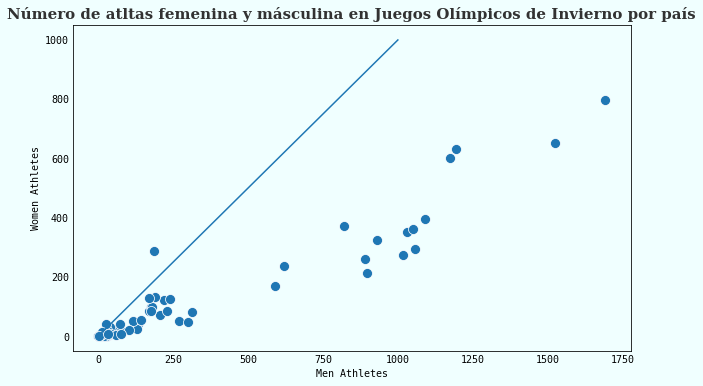

In [68]:
country_women = womenOlympics.groupby('Country')['Sex'].value_counts().rename("Athletes").reset_index()
country_women

country_men = menOlympics.groupby('Country')['Sex'].value_counts().rename("Athletes").reset_index()
country_men

country_men_women = country_women.merge(country_men, how='left', on='Country')
country_men_women.rename(columns={'Sex_x':'Women', 'Sex_y':'Men','Athletes_x':'Women Athletes', 'Athletes_y':'Men Athletes'}, inplace=True)
country_men_women.replace(np.nan, 0, inplace = True)
country_men_women['Men'].replace(0, 'M', inplace = True)
country_men_women['Men Athletes'] = country_men_women['Men Athletes'].astype('int64')
country_men_women
#country_men_women.to_csv("lista.csv", index=False)

fig, ax = plt.subplots(1,1, figsize=(10,6), facecolor='azure')
ax.set_facecolor('azure')
ax.set_axisbelow(True)

ax.tick_params(axis=u'both', which=u'both',length=0)
#ax.set_ylabel("Athletes",fontfamily='monospace',loc='bottom',color='gray')
#ax.set_xlabel("Year",fontfamily='monospace',loc='center',color='gray')

ax.set_title('Número de atltas femenina y másculina en Juegos Olímpicos de Invierno por país', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
sns.scatterplot(country_men_women['Men Athletes'],country_men_women['Women Athletes'], s=100)
x=np.linspace(0, 1000, 100)
plt.plot(x, x + 0, linestyle='solid')

Haciendo zoom en el extremo inferior izquierdo, se ve en detalle la participación de atletas masculinos y femeninos en WOG.

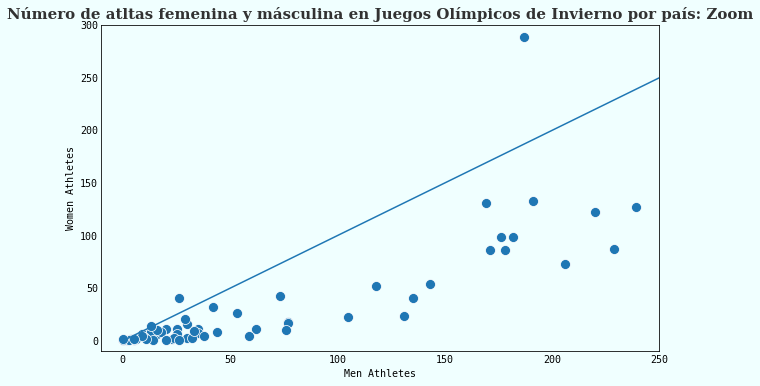

In [69]:
fig, ax = plt.subplots(1,1, figsize=(10,6), facecolor='azure')
ax.set_facecolor('azure')
ax.set_axisbelow(True)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_title('Número de atltas femenina y másculina en Juegos Olímpicos de Invierno por país: Zoom', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
sns.scatterplot(country_men_women['Men Athletes'],country_men_women['Women Athletes'], s=100)
plt.ylim(-10, 300)
plt.xlim(-10, 250)
x=np.linspace(0, 300, 10)
plt.plot(x, x + 0, linestyle='solid')

La siguiente tabla muestra todos los países que, hasta Sochi 2014, han tenido mayor participación femenina que masculina.

In [70]:
country_men_women[country_men_women['Women Athletes'] > country_men_women['Men Athletes']]

,Country,Women,Women Athletes,Men,Men Athletes
15,China,F,289,M,187
16,Colombia,F,1,M,0
29,Honduras,F,1,M,0
46,Malta,F,1,M,0
55,North Korea,F,41,M,26
57,Paraguay,F,1,M,0
75,Togo,F,2,M,0
79,Uzbekistan,F,14,M,13


De la misma manera, se grafica el total de medallas ganadas por atletas masculinos y femenino en WOG. Se observa que la brecha entre géneros se ha acercado bastante; lo cual se valida en la gráfica de proporción: hay 1.2 medallistas hombres por cada medallista mujer.

<AxesSubplot:title={'center':'Medallistas femeninas y masculinas en los Juegos Olímpicos de Invierno'}, xlabel='Year', ylabel='Athletes'>

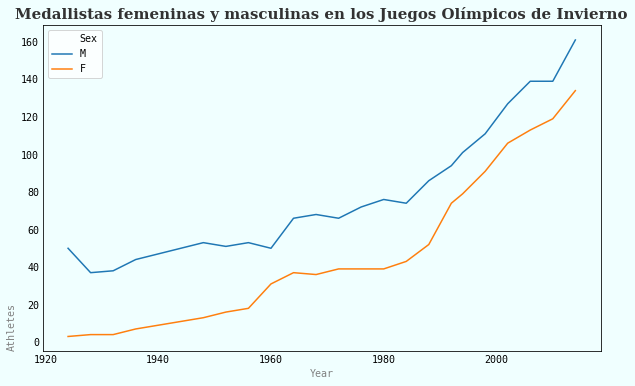

In [71]:
fig, ax = plt.subplots(1,1, figsize=(10,6), facecolor='azure')
ax.set_facecolor('azure')
ax.set_axisbelow(True)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("Athletes",fontfamily='monospace',loc='bottom',color='gray')
ax.set_xlabel("Year",fontfamily='monospace',loc='center',color='gray')

ax.set_title('Medallistas femeninas y masculinas en los Juegos Olímpicos de Invierno', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')

women_menMedalist = countMedal_winter.groupby('Year')['Sex'].value_counts().rename("Athletes").reset_index() #games[season].groupby(["Year","Sex"]).ID.count().rename("Count").reset_index()
sns.lineplot(data = women_menMedalist,x = 'Year',y = 'Athletes',hue = 'Sex')

<AxesSubplot:title={'center':'Ratio de medallistas femeninas y masculinas en los Juegos Olímpicos de Invierno'}, xlabel='Year', ylabel='Ratio'>

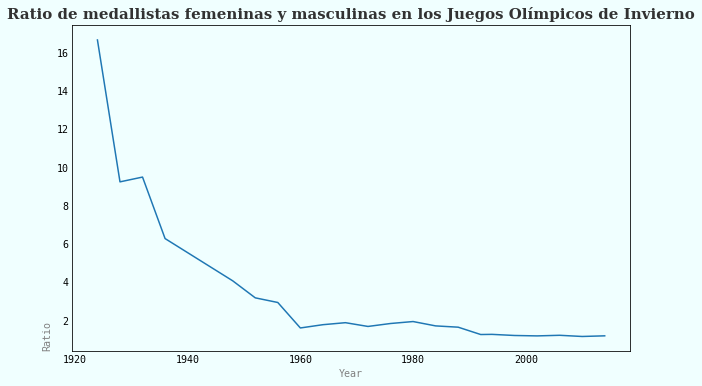

In [72]:
fig, ax = plt.subplots(1,1, figsize=(10,6), facecolor='azure')
ax.set_facecolor('azure')
ax.set_axisbelow(True)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("Ratio",fontfamily='monospace',loc='bottom',color='gray')
ax.set_xlabel("Year",fontfamily='monospace',loc='center',color='gray')

ax.set_title('Ratio de medallistas femeninas y masculinas en los Juegos Olímpicos de Invierno', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')


women_menMedalist = women_menMedalist.pivot(index="Year", columns="Sex", values="Athletes")
women_menMedalist["Ratio"] = women_menMedalist["M"] / women_menMedalist["F"]
final2 =women_menMedalist.reset_index()

sns.lineplot(data = final2, x="Year", y="Ratio")

In [73]:
final2

Sex,Year,F,M,Ratio
0,1924,3,50,16.666667
1,1928,4,37,9.250000
2,1932,4,38,9.500000
3,1936,7,44,6.285714
4,1948,13,53,4.076923
5,1952,16,51,3.187500
6,1956,18,53,2.944444
7,1960,31,50,1.612903
8,1964,37,66,1.783784
9,1968,36,68,1.888889


Los siguientes bloques de código muestran la distribución de los (las) atletas que han participado en los Juegos de Invierno. Así podemos ver su cantidad a lo largo de la historia. De igual manera, se incluye el año en que este deporte apareció por primera vez en WOG [por género].


Disciplina donde han ganado más medallas
Distribución de deportes

In [74]:
def winter_sport_by_gender(gender, womenOlympics, menOlympics):
    if gender == 'F':
        t = womenOlympics[['Name','Sport']]
        test = t.groupby('Sport',as_index=False).count().sort_values('Name', ascending=False)
        
        q = womenOlympics[['Sport','Year']].sort_values('Year', ascending=False)
        q.drop_duplicates(subset=['Sport'], keep='last', inplace=True)
    else:
        t = menOlympics[['Name','Sport']]
        test = t.groupby('Sport',as_index=False).count().sort_values('Name', ascending=False)
        
        q = menOlympics[['Sport','Year']].sort_values('Year', ascending=False)
        q.drop_duplicates(subset=['Sport'], keep='last', inplace=True)
        
    debut_w = test.merge(q, how='left', on='Sport')
    debut_w.rename(columns={'Name':'Athletes', 'Year':'Debut'}, inplace=True)

    return debut_w

In [75]:
history = winter_sport_by_gender('F', womenOlympics, menOlympics)
history

,Sport,Athletes,Debut
0,Alpine Skiing,1524,1936
1,Cross Country Skiing,1193,1952
2,Figure Skating,1097,1924
3,Speed Skating,883,1960
4,Ice Hockey,754,1998
5,Biathlon,637,1992
6,Freestyle Skiing,432,1992
7,Snowboarding,372,1998
8,Luge,365,1964
9,Short Track Speed Skating,333,1992


Se procede a continuación a mostrar la participación (y el número de medallas) femenina, masculina y total por país participante y en general. Aquí el análisis radica en la comparación entre atletas y medallas a fin de determinar qué deporte es de mejor rendimiento, esto es #medallas por atleta participante.

In [76]:
def women_winter_medal(noc, womenOlympics, womenMedal):
    if noc != 'Overall':
        selected_df = womenOlympics[womenOlympics['Country'] == noc]
        result = selected_df[['Name','Sport']].groupby('Sport',as_index=False).count().sort_values('Name', ascending=False)
        result.rename(columns={'Name':'Athletes'}, inplace=True)
        
        selected_df2 = womenMedal[womenMedal['Country'] == noc]
        result2 = selected_df2[['Name','Sport']].groupby('Sport',as_index=False).count().sort_values('Name', ascending=False)
        result2.rename(columns={'Name':'Medals'}, inplace=True)
    else:
        selected_df = womenOlympics
        result = selected_df[['Name','Sport']].groupby('Sport',as_index=False).count().sort_values('Name', ascending=False)
        result.rename(columns={'Name':'Athletes'}, inplace=True)
        
        selected_df2 = womenMedal
        result2 = selected_df2[['Name','Sport']].groupby('Sport',as_index=False).count().sort_values('Name', ascending=False)
        result2.rename(columns={'Name':'Medals'}, inplace=True)        
    
    final = result2.merge(result, how='left', on='Sport')
    
    return result, result2, final

<ol>
    <li>numberW: Atletas femeninas </li>
    <li>medalW: Medallistas femeninas</li>
    <li>totalW: Atletas y medallistas femeninas</li>
</ol>

In [77]:
numberW, medalW, totalW = women_winter_medal('China', womenOlympics, womenMedal)
numberW

,Sport,Athletes
9,Speed Skating,62
6,Ice Hockey,58
4,Figure Skating,32
7,Short Track Speed Skating,31
1,Biathlon,29
2,Cross Country Skiing,29
5,Freestyle Skiing,23
8,Snowboarding,9
0,Alpine Skiing,8
3,Curling,8


In [78]:
def men_winter_medal(noc, menOlympics, menMedal):
    if noc != 'Overall':
        selected_df = menOlympics[menOlympics['Country'] == noc]
        result = selected_df[['Name','Sport']].groupby('Sport',as_index=False).count().sort_values('Name', ascending=False)
        result.rename(columns={'Name':'Athletes'}, inplace=True)
        
        selected_df2 = menMedal[menMedal['Country'] == noc]
        result2 = selected_df2[['Name','Sport']].groupby('Sport',as_index=False).count().sort_values('Name', ascending=False)
        result2.rename(columns={'Name':'Medals'}, inplace=True)
    else:
        selected_df = menOlympics
        result = selected_df[['Name','Sport']].groupby('Sport',as_index=False).count().sort_values('Name', ascending=False)
        result.rename(columns={'Name':'Athletes'}, inplace=True)
        
        selected_df2 = menMedal
        result2 = selected_df2[['Name','Sport']].groupby('Sport',as_index=False).count().sort_values('Name', ascending=False)
        result2.rename(columns={'Name':'Medals'}, inplace=True)        
    
    final = result2.merge(result, how='left', on='Sport')
    
    return result, result2, final

<ol>
    <li>numberM: Atletas masculinos</li>
    <li>medalM: Medallistas masculinos</li>
    <li>totalM: Atletas y medallistas masculinos</li>
</ol>

In [79]:
numberM, medalM, totalM = men_winter_medal('China', menOlympics, menMedal)
numberM

,Sport,Athletes
9,Speed Skating,45
4,Figure Skating,32
6,Short Track Speed Skating,29
2,Cross Country Skiing,24
1,Biathlon,17
5,Freestyle Skiing,16
3,Curling,9
0,Alpine Skiing,7
7,Ski Jumping,4
8,Snowboarding,4


In [80]:
def athletes_winter_medal(noc, df_winter, countMedal_winter):
    if noc != 'Overall':
        selected_df = df_winter[df_winter['Country'] == noc]
        result = selected_df[['Name','Sport']].groupby('Sport',as_index=False).count().sort_values('Name', ascending=False)
        result.rename(columns={'Name':'Athletes'}, inplace=True)
        
        selected_df2 = countMedal_winter[countMedal_winter['Country'] == noc]
        result2 = selected_df2[['Name','Sport']].groupby('Sport',as_index=False).count().sort_values('Name', ascending=False)
        result2.rename(columns={'Name':'Medals'}, inplace=True)
    else:
        selected_df = df_winter
        result = selected_df[['Name','Sport']].groupby('Sport',as_index=False).count().sort_values('Name', ascending=False)
        result.rename(columns={'Name':'Athletes'}, inplace=True)
        
        selected_df2 = countMedal_winter
        result2 = selected_df2[['Name','Sport']].groupby('Sport',as_index=False).count().sort_values('Name', ascending=False)
        result2.rename(columns={'Name':'Medals'}, inplace=True)        
    
    final = result2.merge(result, how='left', on='Sport')
    
    return result, result2, final

<ol>
    <li>athW: Atletas femeninas</li>
    <li>athM: Atletas masculinos</li>
    <li>totWM: Atletas masculinos y femeninos con medalla</li>
</ol>

In [81]:
athW, athM, totWM = athletes_winter_medal('China', hola, countMedal_winter)  #df_winter
athW

,Sport,Athletes
10,Speed Skating,107
4,Figure Skating,64
7,Short Track Speed Skating,60
6,Ice Hockey,58
2,Cross Country Skiing,53
1,Biathlon,46
5,Freestyle Skiing,39
3,Curling,17
0,Alpine Skiing,15
9,Snowboarding,13


In [82]:
totWM

,Sport,Medals,Athletes
0,Short Track Speed Skating,30,60
1,Freestyle Skiing,8,39
2,Figure Skating,7,64
3,Speed Skating,7,107
4,Curling,1,17


In [83]:
def country_winter_medal(sport, df_winter, countMedal_winter):
    if sport != 'Overall':
        selected_df = df_winter[df_winter['Sport'] == sport]
        result = selected_df[['Name','Country']].groupby('Country',as_index=False).count().sort_values('Name', ascending=False)
        result.rename(columns={'Athletes':'Country', 'Name':'Atletes'}, inplace=True)
        
        selected_df2 = countMedal_winter[countMedal_winter['Sport'] == sport]
        result2 = selected_df2[['Name','Country']].groupby('Country',as_index=False).count().sort_values('Name', ascending=False)
        result2.rename(columns={'Athletes':'Country','Name':'Medals'}, inplace=True)
    else:
        selected_df = df_winter
        result = selected_df[['Name','Country']].groupby('Country',as_index=False).count().sort_values('Name', ascending=False)
        result.rename(columns={'Athletes':'Country', 'Name':'Atletes'}, inplace=True)
        
        selected_df2 = countMedal_winter
        result2 = selected_df2[['Name','Country']].groupby('Country',as_index=False).count().sort_values('Name', ascending=False)
        result2.rename(columns={'Athletes':'Country','Name':'Medals'}, inplace=True)        
    
    final = result2.merge(result, how='left', on='Country')
    
    return result, result2, final

<ol>
    <li>val1: Atletas por país</li>
    <li>val2: Medallas por país</li>
    <li>val3: Atletas por país y medallas</li>
</ol>

In [84]:
val1, val2, val3 = country_winter_medal('Cross Country Skiing', hola, countMedal_winter)  #df_winter
val1

,Country,Atletes
23,Finland,254
66,Sweden,249
53,Norway,245
25,Germany,237
35,Italy,233
...,...,...
11,Cameroon,1
13,Chile,1
70,Togo,1
19,Dominica,1


A continuación, se muestra el gráfico de los 5 deportes con mayor cantidad de medallas ganadas por mujeres en WOG por país.

In [85]:
def top_country_winter_games(country, gender, medal):
    if gender == 'Overall' and medal == 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Country'] == country]
    if gender != 'Overall' and medal == 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Country'] == country]
        selected_df = selected_df[selected_df['Sex'] == gender]
    if gender == 'Overall' and medal != 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Country'] == country]
        selected_df = selected_df[selected_df['Medal'] == medal]
    if gender != 'Overall' and medal != 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Country'] == country]
        selected_df = selected_df[selected_df['Sex'] == gender]
        selected_df = selected_df[selected_df['Medal'] == medal]

    fig, ax = plt.subplots(1,1, figsize=(10,4), facecolor='azure')
    ax.set_facecolor('azure')
    ax.set_axisbelow(True)

    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_ylabel("Sport",fontfamily='monospace',loc='bottom',color='gray')
    ax.set_xlabel("Total Medals",fontfamily='monospace',loc='center',color='gray')
    
    ax.set_title('Deportes con más oros en: '+ country +', Género: ' + gender, fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
    
    counted_df_index = selected_df['Sport'].value_counts().index[0:15]
    selected_df = selected_df[selected_df['Sport'].isin(counted_df_index)]
    sns.countplot(y="Sport", data=selected_df, order=counted_df_index, palette=sns.color_palette("mako"))
    return selected_df

Cross Country Skiing    27
Figure Skating          15
Speed Skating           14
Biathlon                 7
Luge                     1
Name: Sport, dtype: int64

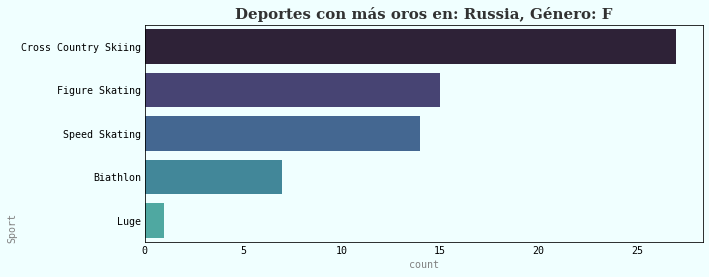

In [86]:
ole = top_country_winter_games('Russia', 'F', 'Gold')
ole['Sport'].value_counts()
##Resaltar aporte medallas femeninas por país##

**5. ANALISIS DE DEPORTES OLÍMPICOS**

Este apartado se encuentra en una plantilla diferente llamada **sportOly.ipynb.**